<a href="https://colab.research.google.com/github/kisung2577/CMPE-258/blob/main/Assignment%204/%5Ba%2Cb%2Cc%2Cd%2Ce%2Cf%2Cg%5D_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Vanishing/Exploding Gradients problem

In [ ]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


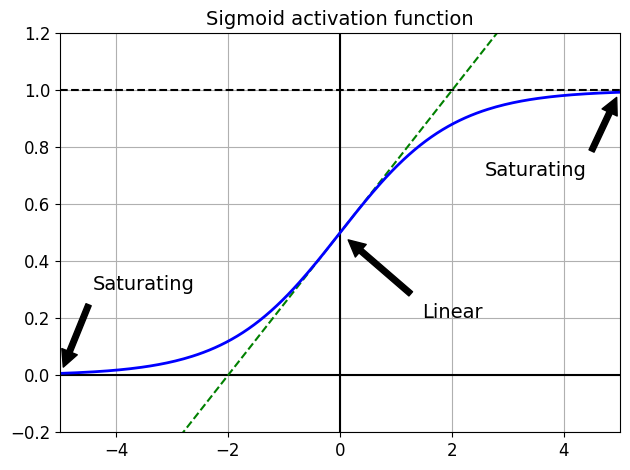

In [ ]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [ ]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)
     

###Xavier and He Initialization

In [ ]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [ ]:

he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

###Non Saturating Activation Functions

Leaky Relu

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


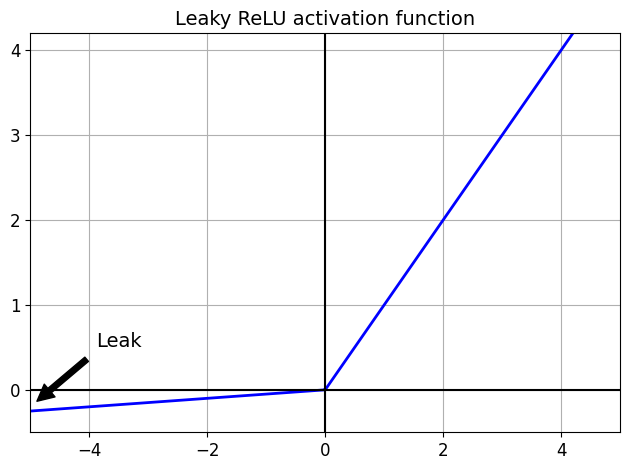

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

Train Network on Fashion MNISt using leaky Relu

In [ ]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2881 - accuracy: 0.6075 - val_loss: 0.8780 - val_accuracy: 0.7126
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7899 - accuracy: 0.7372 - val_loss: 0.7021 - val_accuracy: 0.7738
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6732 - accuracy: 0.7797 - val_loss: 0.6348 - val_accuracy: 0.7962
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6130 - accuracy: 0.7997 - val_loss: 0.5824 - val_accuracy: 0.8100
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5747 - accuracy: 0.8111 - val_loss: 0.5508 - val_accuracy: 0.8184
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5476 - accuracy: 0.8169 - val_loss: 0.5285 - val_accuracy: 0.8248
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5274 - accuracy: 0.8231 - val_loss: 0.5105 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3265 - accuracy: 0.5994 - val_loss: 0.8970 - val_accuracy: 0.7350
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7983 - accuracy: 0.7546 - val_loss: 0.7098 - val_accuracy: 0.7776
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6807 - accuracy: 0.7802 - val_loss: 0.6421 - val_accuracy: 0.7894
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6227 - accuracy: 0.7940 - val_loss: 0.5885 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5857 - accuracy: 0.8040 - val_loss: 0.5575 - val_accuracy: 0.8192
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5588 - accuracy: 0.8112 - val_loss: 0.5346 - val_accuracy: 0.8252
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5380 - accuracy: 0.8168 - val_loss: 0.5151 - val_accuracy:

ELU

Implementing ELU in TensorFlow is trivial, just specify the activation function when building each layer, and use He initialization:


In [ ]:

dense = tf.keras.layers.Dense(50, activation="elu",
                              kernel_initializer="he_normal")

SELU

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


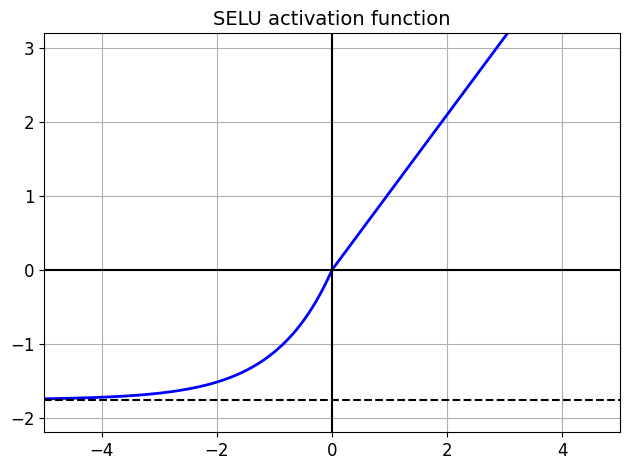

In [ ]:

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [ ]:
z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

save_fig("elu_selu_plot")
plt.show()

In [ ]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


Using Selu on Fashion MNISt data

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
     

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Train model. Scale data with mean 0 and standard deviation 1

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 35s 17ms/step - loss: 1.2039 - accuracy: 0.5402 - val_loss: 0.9774 - val_accuracy: 0.6578
Epoch 2/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.6704 - accuracy: 0.7549 - val_loss: 0.6031 - val_accuracy: 0.7868
Epoch 3/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.5780 - accuracy: 0.7893 - val_loss: 0.6919 - val_accuracy: 0.7402
Epoch 4/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.5262 - accuracy: 0.8135 - val_loss: 0.4878 - val_accuracy: 0.8300
Epoch 5/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4853 - accuracy: 0.8298 - val_loss: 0.4867 - val_accuracy: 0.8322


###Batch Normalization

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_109 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_110 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8391 - accuracy: 0.7201 - val_loss: 0.5526 - val_accuracy: 0.8192
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5741 - accuracy: 0.8013 - val_loss: 0.4748 - val_accuracy: 0.8414
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5194 - accuracy: 0.8204 - val_loss: 0.4401 - val_accuracy: 0.8532
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4796 - accuracy: 0.8335 - val_loss: 0.4179 - val_accuracy: 0.8594
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4552 - accuracy: 0.8407 - val_loss: 0.4021 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4363 - accuracy: 0.8470 - val_loss: 0.3901 - val_accuracy: 0.8684
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4251 - accuracy: 0.8511 - val_loss: 0.3794 - val_accuracy:

###A/B testing

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for T-shirts/tops and pullovers (classes 0 and 2).
* `X_train_B`: a much smaller training set of just the first 200 images of T-shirts/tops and pullovers.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (trousers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots) are somewhat similar to classes in set B (T-shirts/tops and pullovers). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the chapter 14).

In [ ]:
# extra code – split Fashion MNIST into tasks A and B, then train and save
#              model A to "my_model_A".

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A")

###Optimizers

Momentum Optimization

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

Nesterov Accelerated Gradient

In [ ]:

optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)


Adam Optimization

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Adamax Optimization

In [ ]:

optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Learning Rate Scheduling

In [ ]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4876 - accuracy: 0.8289 - val_loss: 0.4054 - val_accuracy: 0.8596
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.3692 - val_accuracy: 0.8714
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3438 - accuracy: 0.8774 - val_loss: 0.3710 - val_accuracy: 0.8674
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.8843 - val_loss: 0.3486 - val_accuracy: 0.8792
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3081 - accuracy: 0.8906 - val_loss: 0.3433 - val_accuracy: 0.8774
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8945 - val_loss: 0.3397 - val_accuracy: 0.8806
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2847 - accuracy: 0.8987 - val_loss: 0.3353 - val_accuracy:

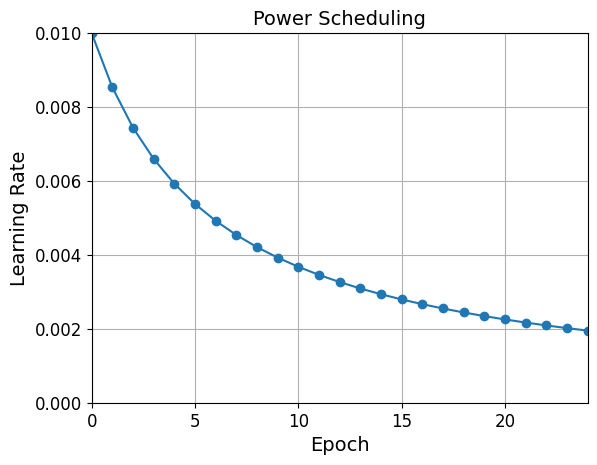

In [ ]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7415 - accuracy: 0.7813 - val_loss: 0.6688 - val_accuracy: 0.7994 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6237 - accuracy: 0.8093 - val_loss: 0.6383 - val_accuracy: 0.8188 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6040 - accuracy: 0.8157 - val_loss: 0.5802 - val_accuracy: 0.8292 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5827 - accuracy: 0.8248 - val_loss: 0.5276 - val_accuracy: 0.8388 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5122 - accuracy: 0.8413 - val_loss: 0.4845 - val_accuracy: 0.8626 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4843 - accuracy: 0.8504 - val_loss: 0.4859 - val_accuracy: 0.8438 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 8s

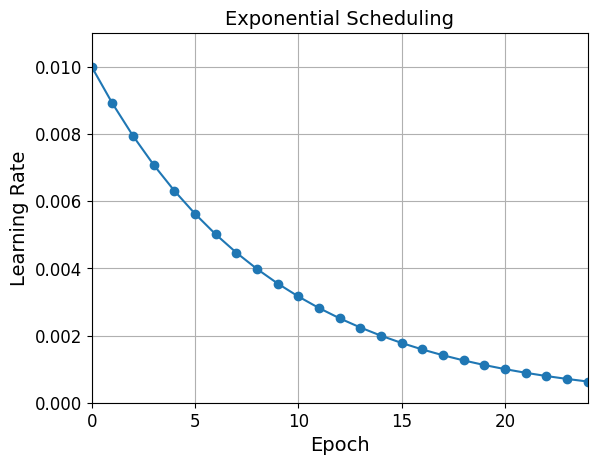

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Piecewise Constant Scheduling

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7537 - accuracy: 0.7777 - val_loss: 0.8329 - val_accuracy: 0.7700 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7273 - accuracy: 0.7823 - val_loss: 0.7299 - val_accuracy: 0.7878 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8569 - accuracy: 0.7430 - val_loss: 1.2356 - val_accuracy: 0.6332 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9589 - accuracy: 0.6807 - val_loss: 1.0930 - val_accuracy: 0.6454 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9197 - accuracy: 0.6763 - val_loss: 0.8197 - val_accuracy: 0.7272 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6244 - accuracy: 0.7783 - val_loss: 0.5606 - val_accuracy: 0.8258 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8s

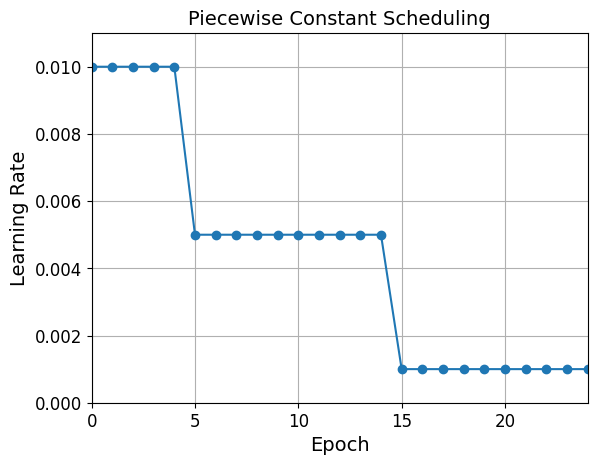

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Performance Scheduling

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5864 - accuracy: 0.8083 - val_loss: 0.5166 - val_accuracy: 0.8460 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5019 - accuracy: 0.8395 - val_loss: 0.5357 - val_accuracy: 0.8456 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5155 - accuracy: 0.8429 - val_loss: 0.6135 - val_accuracy: 0.8392 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5078 - accuracy: 0.8475 - val_loss: 0.5285 - val_accuracy: 0.8422 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5396 - accuracy: 0.8456 - val_loss: 0.5456 - val_accuracy: 0.8538 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5224 - accuracy: 0.8503 - val_loss: 0.5776 - val_accuracy: 0.8544 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

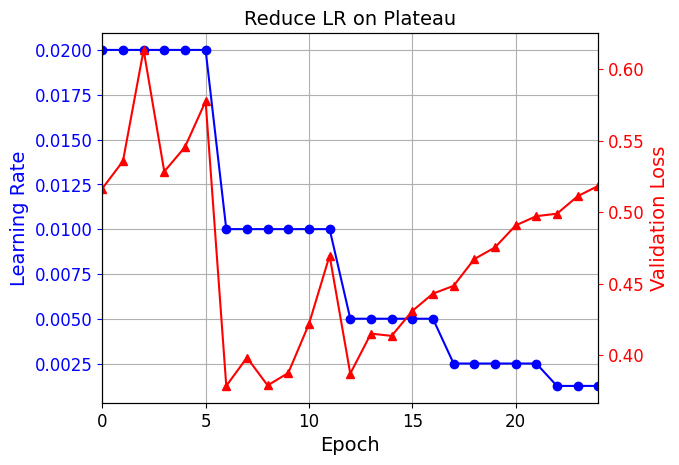

In [ ]:

plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Keras scheduler

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4826 - accuracy: 0.8304 - val_loss: 0.4030 - val_accuracy: 0.8630
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8670 - val_loss: 0.3711 - val_accuracy: 0.8696
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3436 - accuracy: 0.8783 - val_loss: 0.3696 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3219 - accuracy: 0.8858 - val_loss: 0.3471 - val_accuracy: 0.8774
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3070 - accuracy: 0.8903 - val_loss: 0.3399 - val_accuracy: 0.8810
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8953 - val_loss: 0.3382 - val_accuracy: 0.8824
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2827 - accuracy: 0.8994 - val_loss: 0.3331 - val_accuracy:

In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

1Cycle Scheduling

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
     

430/430 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.4014


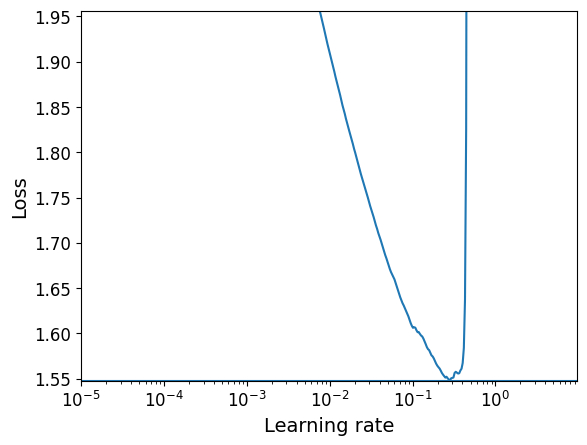

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)


Avoid overfitting Through Regularization

###l1 and l2 regularization

In [ ]:
layer = keras.layers.Dense(100, activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 5ms/step - loss: 1.5857 - accuracy: 0.8130 - val_loss: 0.7042 - val_accuracy: 0.8396
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7179 - accuracy: 0.8273 - val_loss: 0.6873 - val_accuracy: 0.8352


In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6344 - accuracy: 0.8143 - val_loss: 0.7092 - val_accuracy: 0.8394
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7201 - accuracy: 0.8283 - val_loss: 0.6951 - val_accuracy: 0.8334


###Dropout

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5699 - accuracy: 0.8031 - val_loss: 0.3773 - val_accuracy: 0.8654
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4240 - accuracy: 0.8451 - val_loss: 0.3480 - val_accuracy: 0.8734


###Alpha Dropout

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6640 - accuracy: 0.7581 - val_loss: 0.6016 - val_accuracy: 0.8400
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5610 - accuracy: 0.7940 - val_loss: 0.5633 - val_accuracy: 0.8498
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5276 - accuracy: 0.8037 - val_loss: 0.5120 - val_accuracy: 0.8482
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5096 - accuracy: 0.8112 - val_loss: 0.4709 - val_accuracy: 0.8626
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4932 - accuracy: 0.8170 - val_loss: 0.4850 - val_accuracy: 0.8596
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4830 - accuracy: 0.8196 - val_loss: 0.4835 - val_accuracy: 0.8602
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4700 - accuracy: 0.8273 - val_loss: 0.4749 - val_accuracy:

In [ ]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3288 - accuracy: 0.8867


[0.32878950238227844, 0.8867454528808594]

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.8635


[0.45833179354667664, 0.8634999990463257]

In [ ]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 8s 5ms/step - loss: 0.4186 - accuracy: 0.8449


###MonteCarlo Dropout

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)
np.round(y_probas[:, :1], 2)
np.round(y_proba[:1], 2)

1/1 [==============================] - 0s 94ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.31, 0.  , 0.58]],
      dtype=float32)

In [ ]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.26, 0.  , 0.28]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8647

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
     

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])
mc_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_140 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_141 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:

mc_model.set_weights(model.get_weights())
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 18ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.24, 0.  , 0.62]],
      dtype=float32)

###Max Norm

In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4787 - accuracy: 0.8323 - val_loss: 0.3760 - val_accuracy: 0.8670
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3591 - accuracy: 0.8700 - val_loss: 0.3866 - val_accuracy: 0.8628
